# M506 basic analysis

The M506 is the normal mounted Trisonica anemometer.

Offset 0° M506

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [ ]:
from wind_tools import *
import pandas as pd
import numpy as np
import os
from pathlib import Path
import seaborn as sns
import matplotlib
from windrose import WindroseAxes
#matplotlib.use('Qt5Agg')

import matplotlib.pyplot as plt
sns.set(style='whitegrid')
import plotly.express as px

matplotlib.rcParams['figure.figsize'] = (16,10)

In [ ]:
def get_lastest_file(folder, name_re):
    """TODO Document me"""
    files = folder.glob(name_re)
    return max(files, key=os.path.getctime)

## Load data

In [ ]:
proc_dir = Path("2020_data/data_field_v2_from_20208010/processed/2min")

wm1_path = get_lastest_file(proc_dir, "eddypro_WM1_preproc_2min_full_output*")
m6_path = get_lastest_file(proc_dir, "eddypro_TRS_M506_2min_full_output*")


cache_dir = Path("data_cache")
# start_date = '2020-07-24 14:00:00'
# end_date = '2020-08-03 10:00:00'

wind_cols = ['u_unrot','v_unrot', 'w_unrot', 'wind_speed', 'wind_dir']
wind_comp_rename = {'u_unrot': 'u', 'v_unrot': 'v', 'w_unrot': 'w'}

In [ ]:
wm1, m6 = map(
    lambda p: load_ep_cache(p, cache_dir= cache_dir)
#     .loc[start_date:end_date]
    .loc[:,wind_cols]
    .rename(columns=wind_comp_rename)
#     .interpolate(), #to remove NaN maybe not the best idea
    ,
    [wm1_path, m6_path])

**Rotate WM1 components** EP does not rotate them according to installation offset

In [ ]:
wm1

,u,v,w,wind_speed,wind_dir
date_time,,,,,
2020-08-10 14:32:00,0.346639,-1.588070,-0.334207,1.660470,257.4510
2020-08-10 14:34:00,-0.195475,-1.829270,0.089292,1.841850,279.5790
2020-08-10 14:36:00,0.966933,-1.906450,-0.182208,2.145390,242.9220
2020-08-10 14:38:00,1.107570,-2.566200,-0.105617,2.797010,248.2430
2020-08-10 14:40:00,0.548304,-1.303470,0.010458,1.414130,248.6050
...,...,...,...,...,...
2020-08-12 09:22:00,-0.683900,-0.545275,-0.016600,0.874825,323.2050
2020-08-12 09:24:00,-0.069217,0.898592,0.042375,0.902249,63.9742
2020-08-12 09:26:00,0.036725,1.037120,-0.195092,1.055950,84.7697


In [ ]:
m6

,u,v,w,wind_speed,wind_dir
date_time,,,,,
2020-08-10 14:32:00,0.301839,-1.868680,-0.062416,1.895000,260.1880
2020-08-10 14:34:00,-0.260900,-2.112430,-0.001633,2.128480,279.6020
2020-08-10 14:36:00,0.877642,-2.206810,-0.131458,2.378560,248.3730
2020-08-10 14:38:00,0.941008,-2.988280,-0.036142,3.133140,254.8690
2020-08-10 14:40:00,0.366300,-1.549960,-0.118258,1.597040,259.3360
...,...,...,...,...,...
2020-08-12 09:22:00,-0.274362,-0.158217,0.003167,0.316729,343.3390
2020-08-12 09:24:00,-0.080588,0.715733,0.126192,0.731227,79.3769
2020-08-12 09:26:00,-0.047192,0.835071,0.106692,0.843181,84.6337


# Explore data

## Angle of Attack

In [ ]:
wm1 = add_angle_attack(wm1)

In [ ]:
wm1.angle_attack.plot(ax=get_ax())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='date_time'>

In [ ]:
### try to load a high freq half an hour

In [ ]:
test_period = add_wind_speed(add_angle_attack(pd.read_csv("2020_data/data_field_v2_from_20208010/preprocessed/20200811-0000_WM_174605_com1.csv")))

In [ ]:
plot_components([test_period], ['angle_attack', 'wind_speed'], vertical=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'angle_attack'}>,
       <AxesSubplot:title={'center':'wind_speed'}>], dtype=object)

In [ ]:
wm1.loc['2020-08-11 00:30': '2020-08-11 01:00'].angle_attack.plot(ax=get_ax(), figsize=(10,5))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='date_time'>

In [ ]:
add_angle_attack(test_period).angle_attack.plot(ax=get_ax())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:>

In [ ]:
wm1.angle_attack.resample('30min').mean().plot(ax=get_ax())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='date_time'>

## wind speed

In [ ]:
plot_components(resample([wm1, m6], '8min'),('wind_speed', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'wind_speed'}, xlabel='date_time'>],
      dtype=object)

In [ ]:
plot_components_scatter([wm1.interpolate(), m6.interpolate()], ('wind_speed', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

/home/simone/Documents/Tesi/trisonica-anemometer-comparison/wind_tools.py:108: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(*n_plts, figsize=figsize)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## u

In [ ]:
plot_components(resample([wm1, m6], '8min'),('u', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'u'}, xlabel='date_time'>],
      dtype=object)

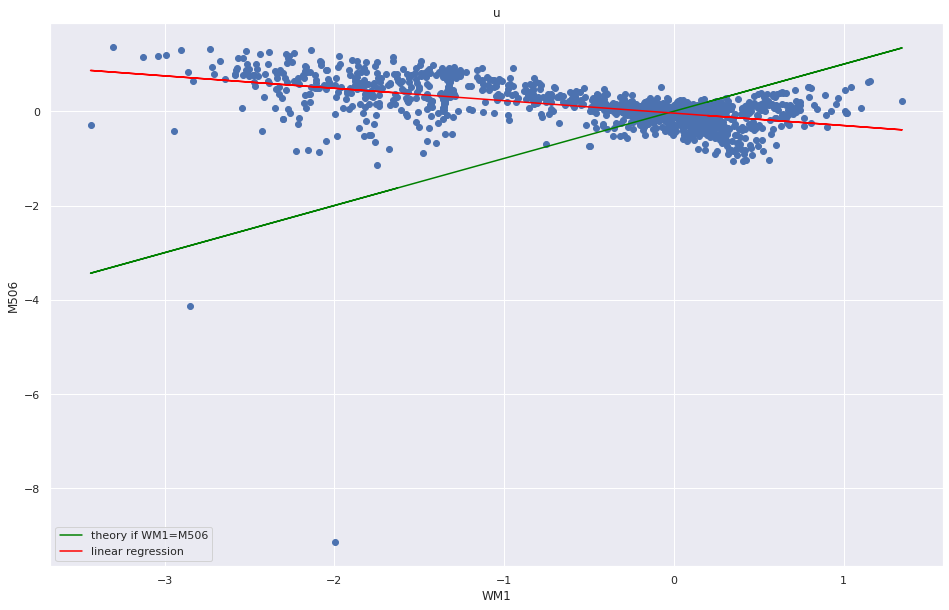

In [ ]:
plot_components_scatter([wm1, m6], ('u', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

## v

Need to take into account that on the V direction is almost parallel to the mouting structure so there can be interference

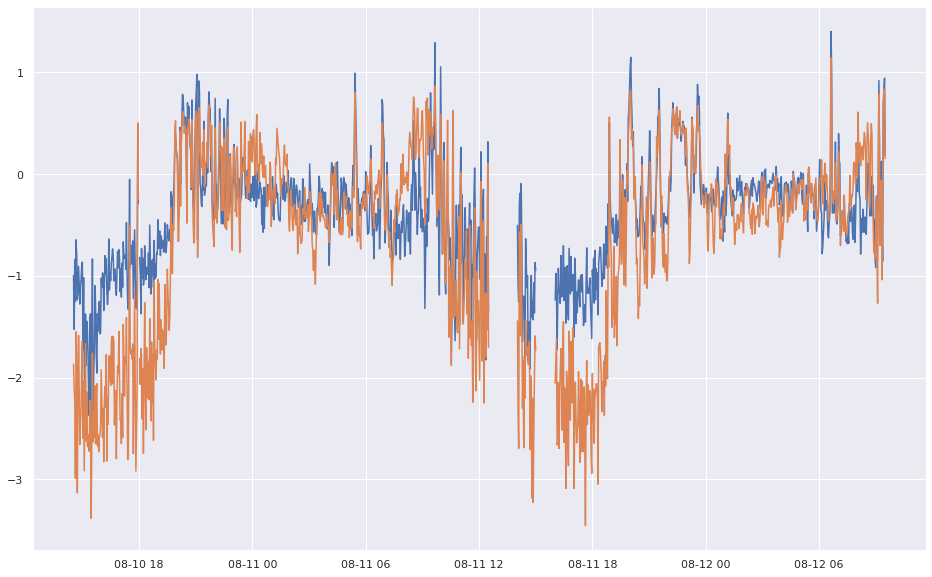

In [ ]:
plt.plot(wm1.u)
plt.plot(m6.v)

array([<AxesSubplot:title={'center':'v'}, xlabel='date_time'>],
      dtype=object)

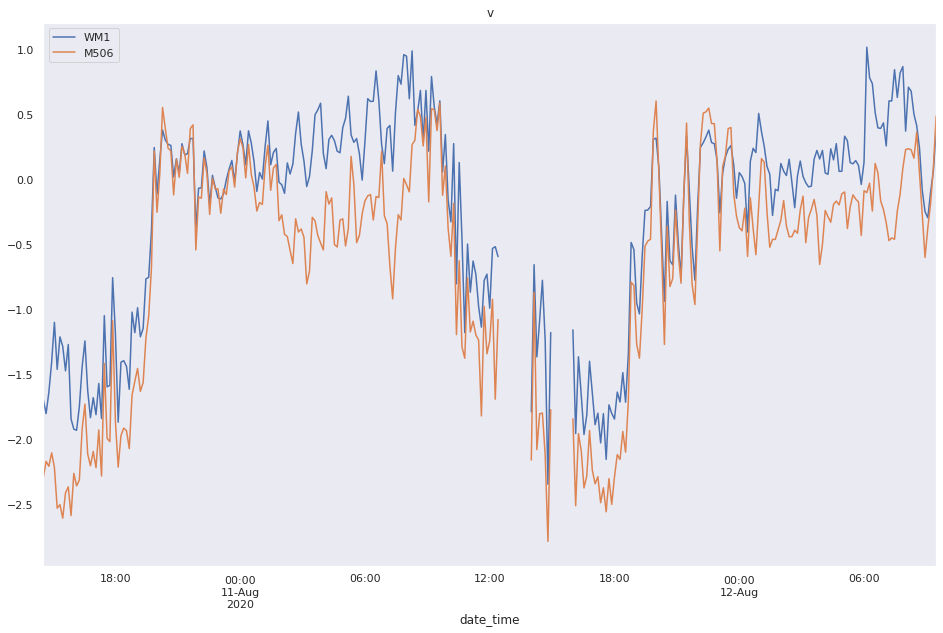

In [ ]:
plot_components(resample([wm1, m6], '8min'),('v', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

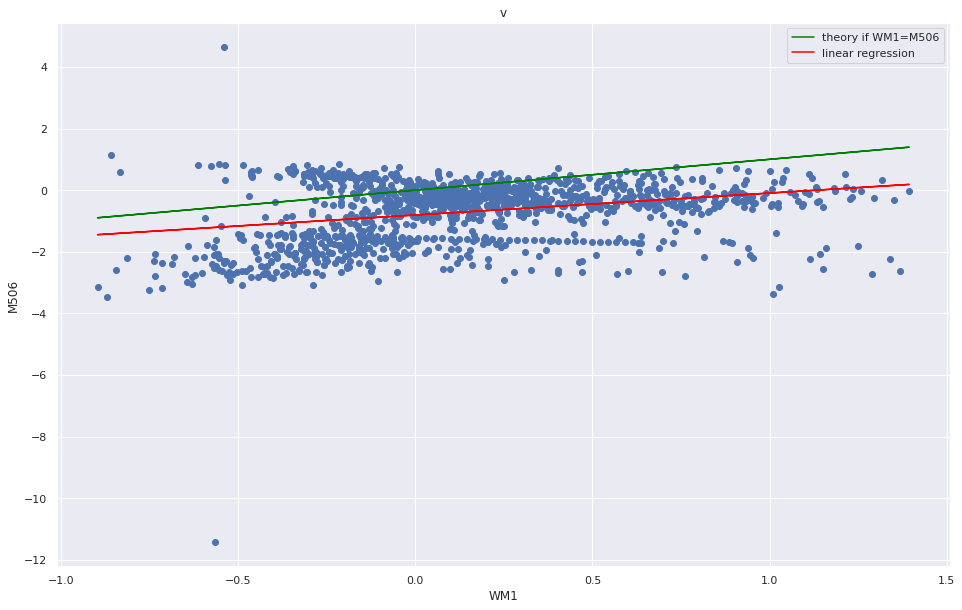

In [ ]:
plot_components_scatter([wm1, m6], ('v', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

## w

can be worse but still rather bad

In [ ]:
plot_components(resample([wm1, m6], '8min'), ('w', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}], figsize=(16,5))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'w'}, xlabel='date_time'>],
      dtype=object)

In [ ]:
wm1 = add_angle_attack(wm1)
m6 = add_angle_attack(m6)

In [ ]:
axes = get_ax(3,1)
plot_components(resample([wm1, m6], '8min'), ['wind_speed', 'w' ], vertical=False, ax=axes)
plot_components(resample([wm1], '3min'), ['angle_attack'], vertical=False, ax=axes[2])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'angle_attack'}, xlabel='date_time'>],
      dtype=object)

In [ ]:
err= wm1 -m6

In [ ]:
sns.scatterplot(err.w.abs() , wm1.wind_speed, ax=get_ax())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<AxesSubplot:xlabel='w', ylabel='wind_speed'>

In [ ]:
plot_components_scatter([wm1.interpolate(), m6.interpolate()], ('w', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}], linreg=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


## But the Direction ...
looks bad :(

array([<AxesSubplot:title={'center':'wind_dir'}, xlabel='date_time'>],
      dtype=object)

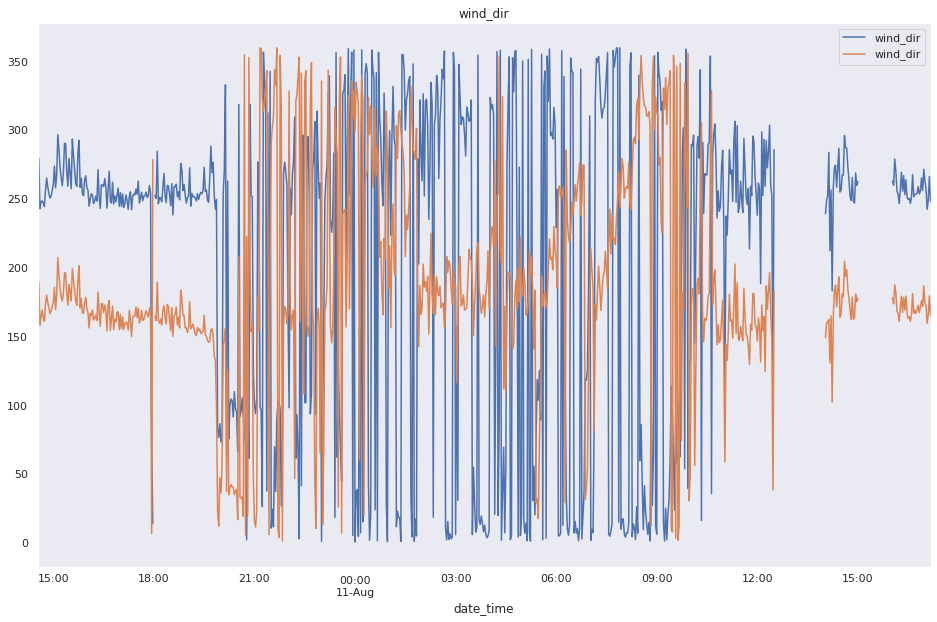

In [ ]:
plot_components([wm1[:800], mod(m6[:800]-90)], ('wind_dir',))

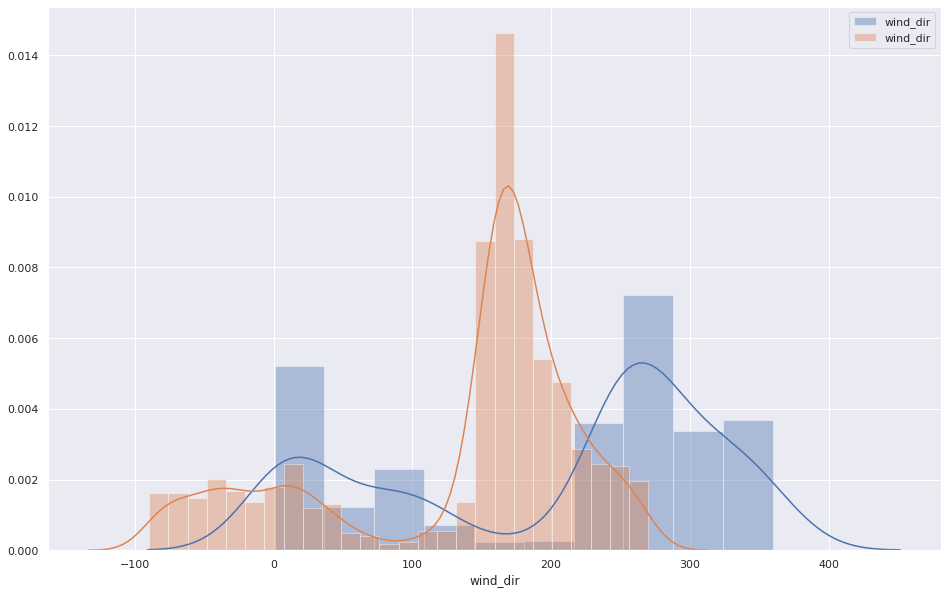

In [ ]:
plot_dist_comp([wm1, m6-90], ('wind_dir',))

## Windrose`

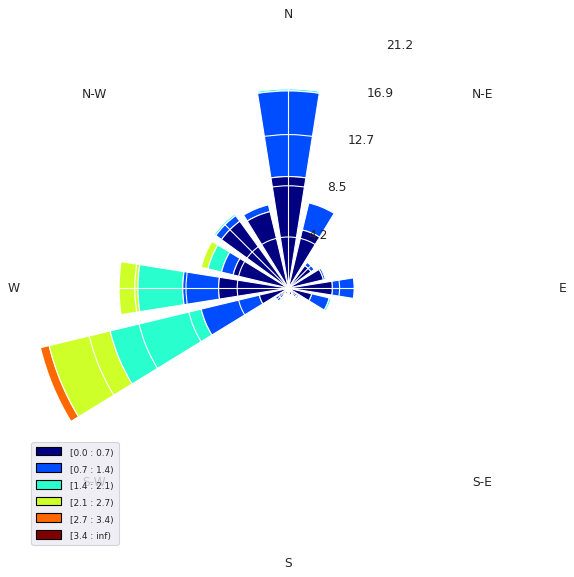

In [ ]:
ax = WindroseAxes.from_ax()
ax.bar(wm1.wind_dir, wm1.wind_speed, normed=True, opening=0.8)
ax.set_legend()
plt.show()

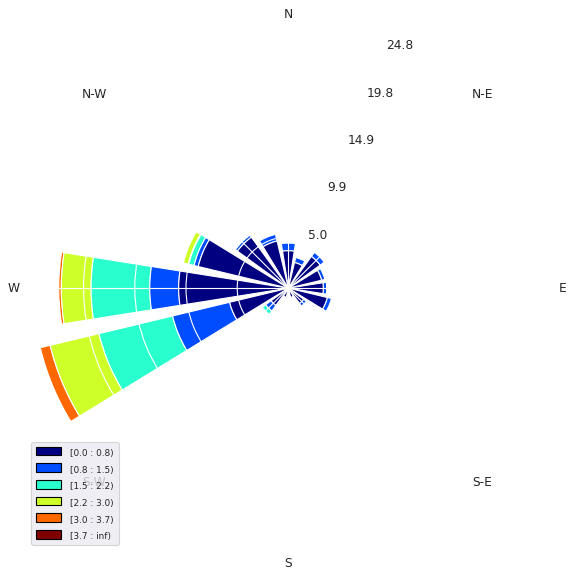

In [ ]:
ax = WindroseAxes.from_ax()
ax.bar(m6.wind_dir, m6.wind_speed, normed=True, opening=0.8)
ax.set_legend()
plt.show()

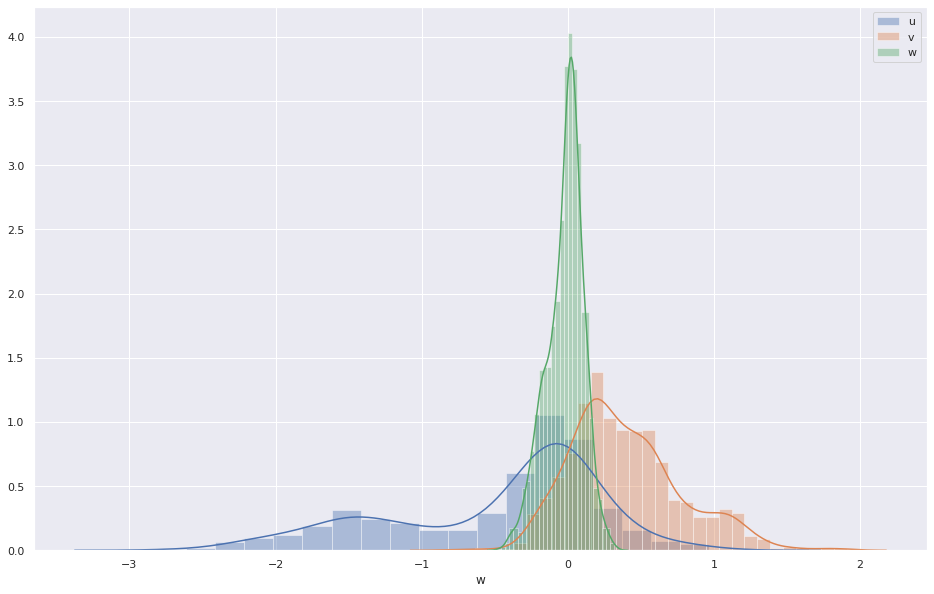

In [ ]:
plot_dist_comp([wm1-m6])

## Absolute error compared to direction

In [ ]:
err = wm1 - m6

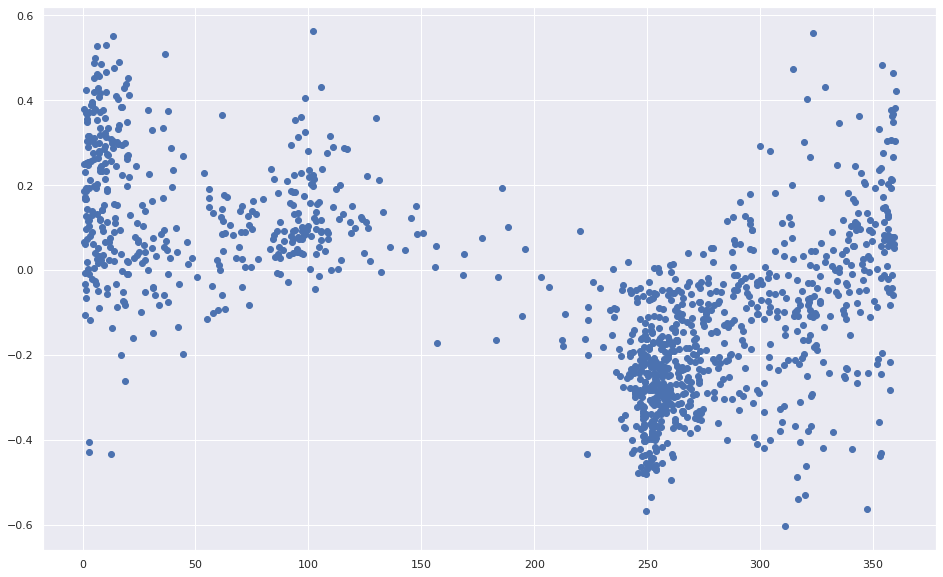

In [ ]:
plt.scatter(wm1.wind_dir, err.wind_speed )

<AxesSubplot:xlabel='wind_speed'>

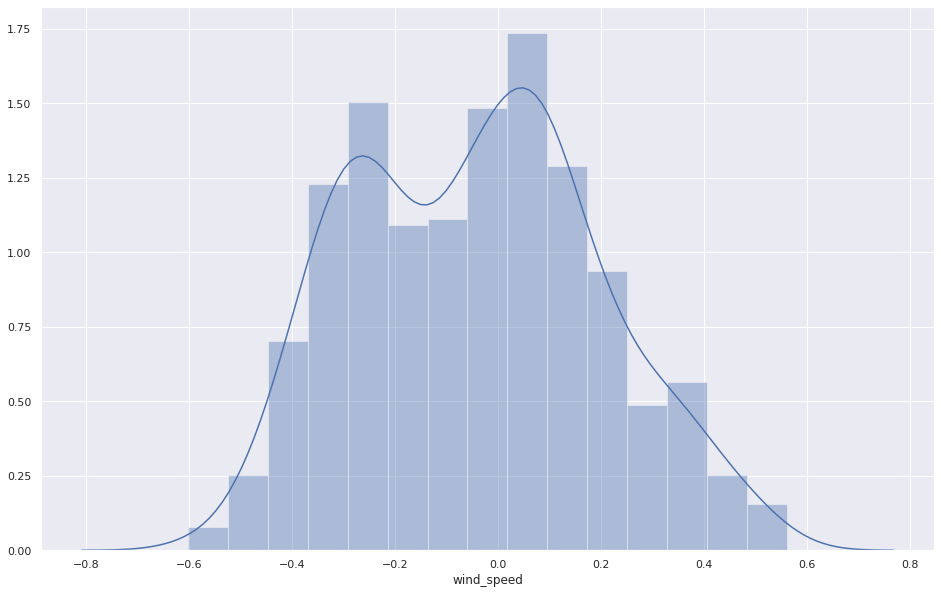

In [ ]:
sns.distplot(err.wind_speed)

## Just rotate by 27°

27° N is the rough average of the reading of the compass sensor on M506 (would love to know more about this sensor but there is nothing in the datasheet), while the estimated offset in the field with manual compass is 0° N, hence the idea to try to rotate by 27°.

TODO need to get a more exact number

**TODO** need to have better plots

In [ ]:
m6r = rotate_wind_ang(m6, 27)

In [ ]:
m6r = add_wind_dir(m6r) # recalc wind dir

**Warning** direction data cannot be resampled with normal mean

array([<AxesSubplot:title={'center':'wind_dir'}, xlabel='date_time'>],
      dtype=object)

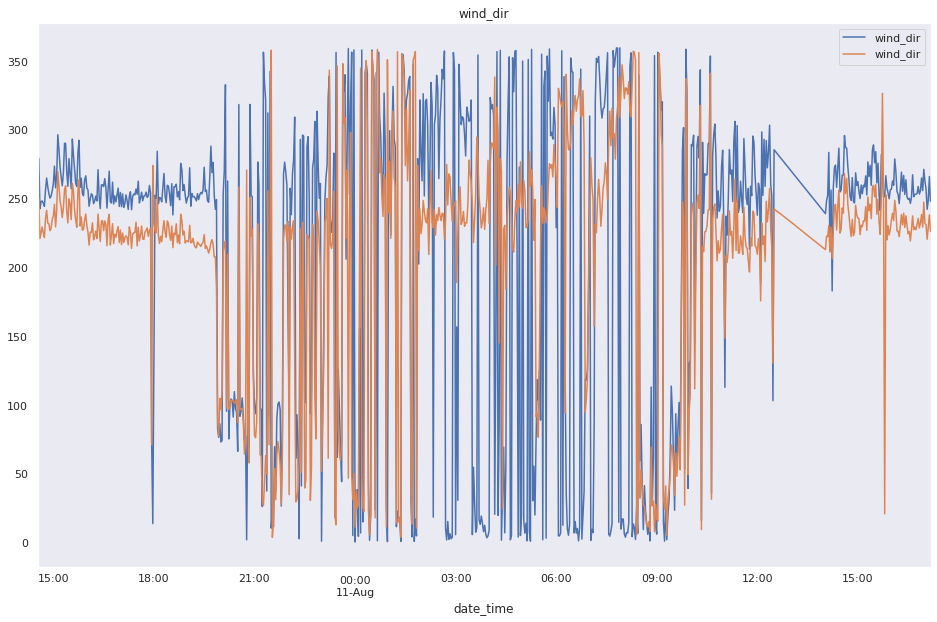

In [ ]:
plot_components([wm1[:800], m6r[:800]], ('wind_dir',))

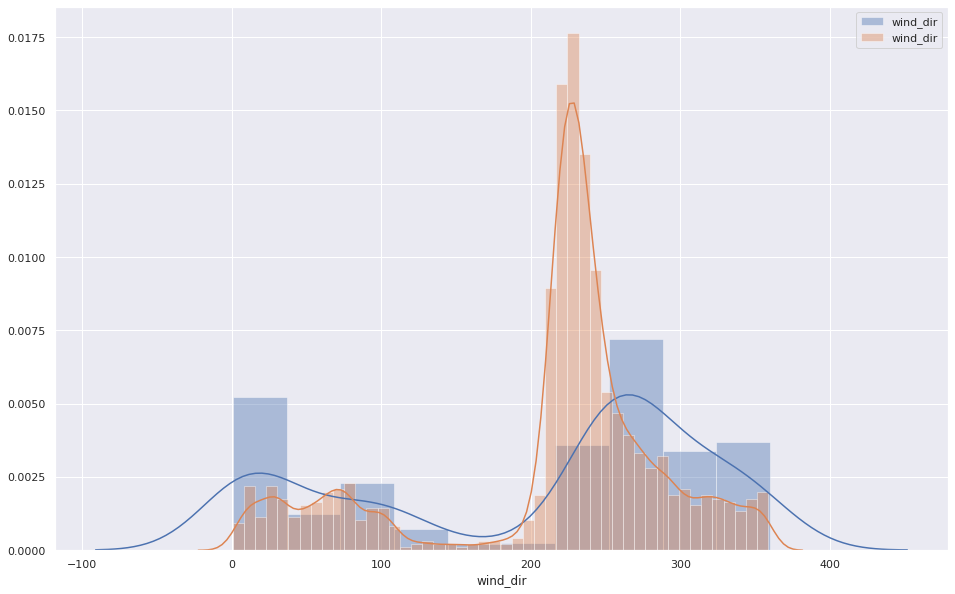

In [ ]:
plot_dist_comp([wm1, m6r], ('wind_dir',))

### Ci siamooo ma... the v is way worse now

array([<AxesSubplot:title={'center':'v'}, xlabel='date_time'>],
      dtype=object)

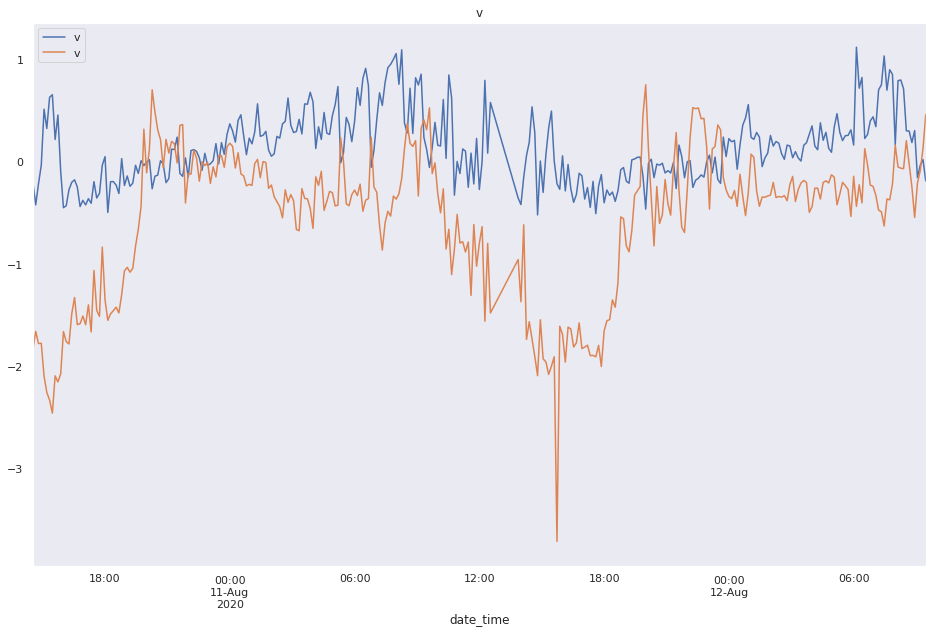

In [ ]:
plot_components(resample([wm1, m6r], '8min'), 'v')

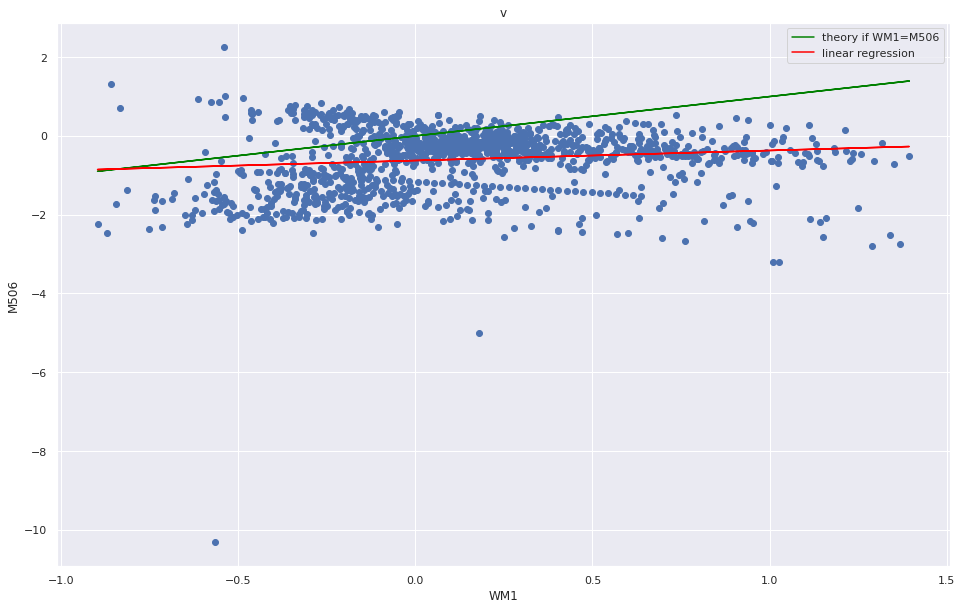

In [ ]:
plot_components_scatter([wm1, m6r], ('v', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

### u is a bit worse as well

array([<AxesSubplot:title={'center':'u'}, xlabel='date_time'>],
      dtype=object)

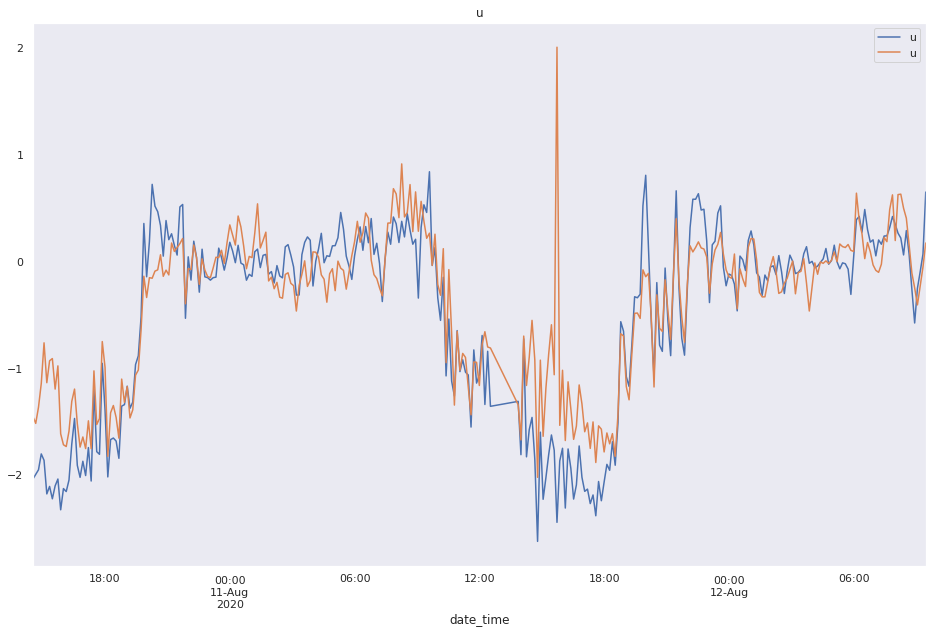

In [ ]:
plot_components(resample([wm1, -m6r], '8min'), 'u')

# Conclusion

## ma se é wm1 che scazza 

In [ ]:
wm1 = add_hor_wind_speed(wm1)

In [ ]:
wm1r = add_hor_wind_speed(wm1r)

In [ ]:
wm1

,u,v,w,wind_speed,wind_dir,wind_speed_hor
date_time,,,,,,
2020-08-10 14:32:00,-0.997092,-1.288860,-0.333608,1.663320,257.4790,1.629525
2020-08-10 14:34:00,-1.526010,-1.026130,0.089625,1.841100,279.5420,1.838926
2020-08-10 14:36:00,-0.839254,-1.966400,-0.181608,2.145710,242.9240,2.138008
2020-08-10 14:38:00,-1.253230,-2.498030,-0.105850,2.796770,248.2170,2.794770
2020-08-10 14:40:00,-0.646417,-1.258450,0.009992,1.414800,248.6120,1.414762
...,...,...,...,...,...,...
2020-08-12 09:22:00,-0.856775,0.174583,-0.017275,0.874552,323.2640,0.874381
2020-08-12 09:24:00,0.645167,0.630683,0.042383,0.903215,64.1510,0.902220
2020-08-12 09:26:00,0.818796,0.638592,-0.195817,1.056680,84.7846,1.038377


In [ ]:
m6 = add_hor_wind_speed(m6)

array([<AxesSubplot:title={'center':'wind_speed_hor'}, xlabel='date_time'>],
      dtype=object)

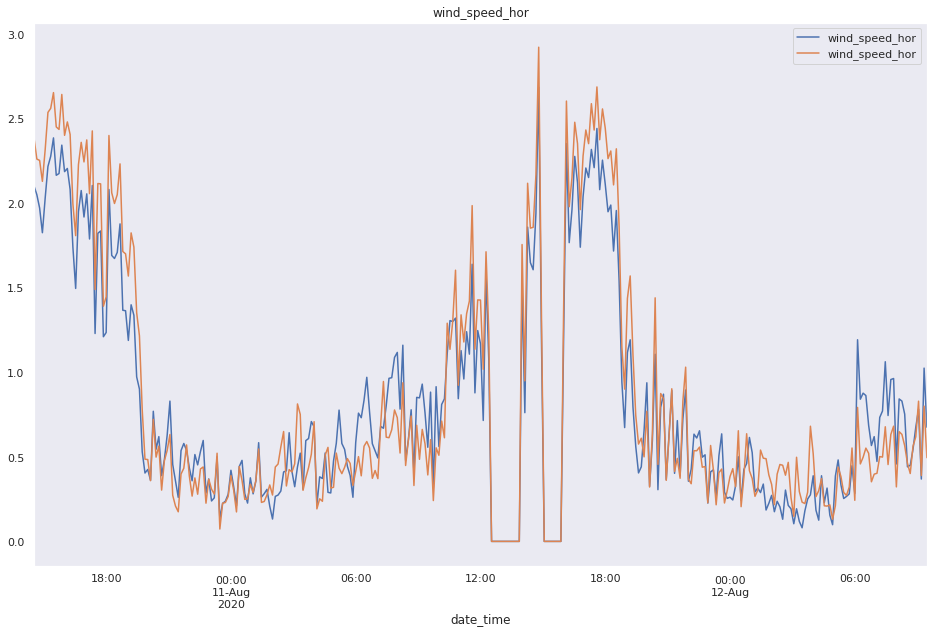

In [ ]:
plot_components(resample([wm1, m6], '8min'), ['wind_speed_hor'])

array([<AxesSubplot:title={'center':'wind_speed_hor'}, xlabel='date_time'>,
       <AxesSubplot:title={'center':'u'}, xlabel='date_time'>,
       <AxesSubplot:title={'center':'v'}, xlabel='date_time'>],
      dtype=object)

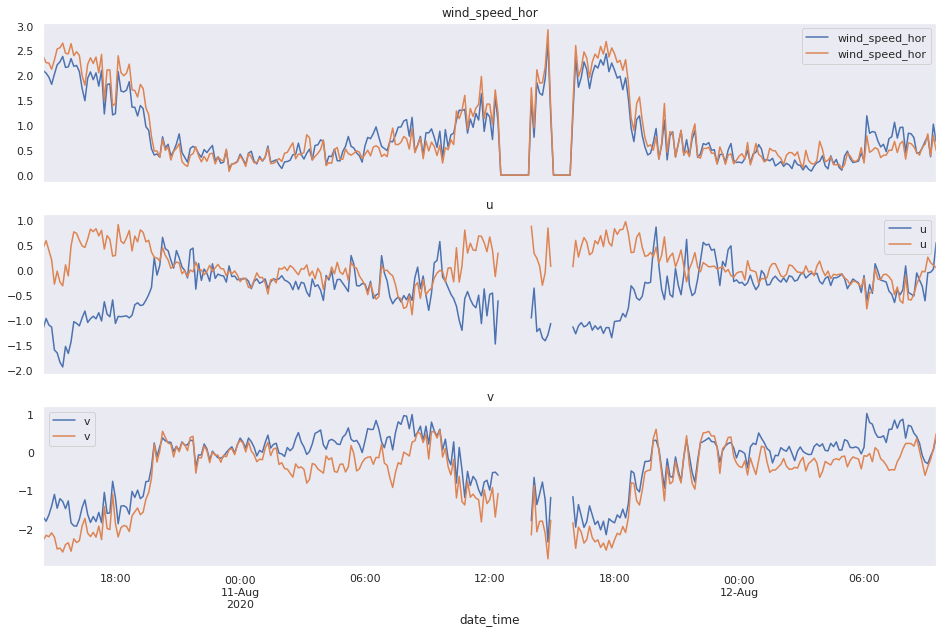

In [ ]:
plot_components(resample([wm1, m6], '8min'), ['wind_speed_hor', 'u', 'v'], vertical=False)

In [ ]:
wm1.wind_dir

date_time
2020-08-10 14:32:00    257.4790
2020-08-10 14:34:00    279.5420
2020-08-10 14:36:00    242.9240
2020-08-10 14:38:00    248.2170
2020-08-10 14:40:00    248.6120
                         ...   
2020-08-12 09:22:00    323.2640
2020-08-12 09:24:00     64.1510
2020-08-12 09:26:00     84.7846
2020-08-12 09:28:00     95.5230
2020-08-12 09:30:00     86.0842
Name: wind_dir, Length: 1290, dtype: float64

In [ ]:
test_close(mod(add_wind_dir(wm1r).wind_dir), wm1.wind_dir)

AssertionError: 

In [ ]:
add_wind_dir(wm1r).wind_dir

date_time
2020-08-10 14:32:00    357.726368
2020-08-10 14:34:00     16.082057
2020-08-10 14:36:00    343.112653
2020-08-10 14:38:00    346.642340
2020-08-10 14:40:00    347.187809
                          ...    
2020-08-12 09:22:00     61.517347
2020-08-12 09:24:00    185.650418
2020-08-12 09:26:00    192.048766
2020-08-12 09:28:00    195.598344
2020-08-12 09:30:00    199.524684
Name: wind_dir, Length: 1290, dtype: float64

In [ ]:
wm1.wind_dir

date_time
2020-08-10 14:32:00    257.4790
2020-08-10 14:34:00    279.5420
2020-08-10 14:36:00    242.9240
2020-08-10 14:38:00    248.2170
2020-08-10 14:40:00    248.6120
                         ...   
2020-08-12 09:22:00    323.2640
2020-08-12 09:24:00     64.1510
2020-08-12 09:26:00     84.7846
2020-08-12 09:28:00     95.5230
2020-08-12 09:30:00     86.0842
Name: wind_dir, Length: 1290, dtype: float64

In [ ]:
wm1_rot = R.from_euler('z', [50], degrees=True)

wm1myr = wm1_rot.apply(wm1.to_numpy()[:, [0,1,2]])
wm1myr = pd.DataFrame(wm1myr)
wm1myr.columns = list('uvw')
wm1myr.index = wm1.index
wm1myr = wm1myr.pipe(add_wind_speed).pipe(add_wind_dir).pipe(add_hor_wind_speed)

In [ ]:
wm1myr

,u,v,w,wind_speed,wind_dir,wind_speed_hor
date_time,,,,,,
2020-08-10 14:32:00,0.346406,-1.592280,-0.333608,1.663324,257.726368,1.629525
2020-08-10 14:34:00,-0.194839,-1.828575,0.089625,1.841109,276.082057,1.838926
2020-08-10 14:36:00,0.966888,-1.906883,-0.181608,2.145707,243.112653,2.138008
2020-08-10 14:38:00,1.108041,-2.565733,-0.105850,2.796774,246.642340,2.794770
2020-08-10 14:40:00,0.548520,-1.304100,0.009992,1.414797,247.187809,1.414762
...,...,...,...,...,...,...
2020-08-12 09:22:00,-0.684463,-0.544108,-0.017275,0.874552,321.517347,0.874381
2020-08-12 09:24:00,-0.068426,0.899622,0.042383,0.903215,85.650418,0.902220
2020-08-12 09:26:00,0.037122,1.037713,-0.195817,1.056679,92.048766,1.038377


array([<AxesSubplot:title={'center':'wind_speed_hor'}, xlabel='date_time'>],
      dtype=object)

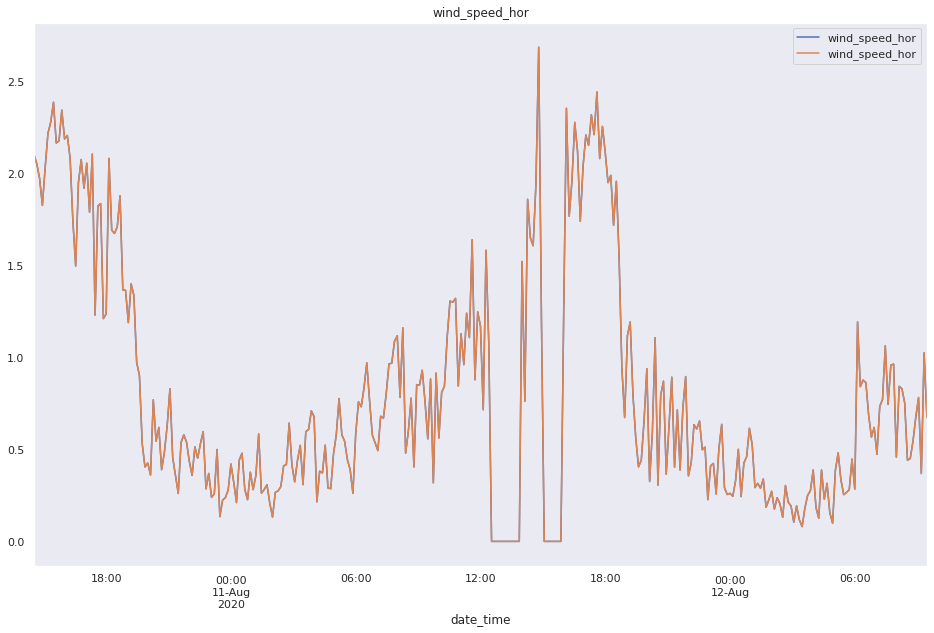

In [ ]:
plot_components(resample([wm1, wm1myr], '8min'), ['wind_speed_hor'])

array([<AxesSubplot:title={'center':'wind_dir'}, xlabel='date_time'>],
      dtype=object)

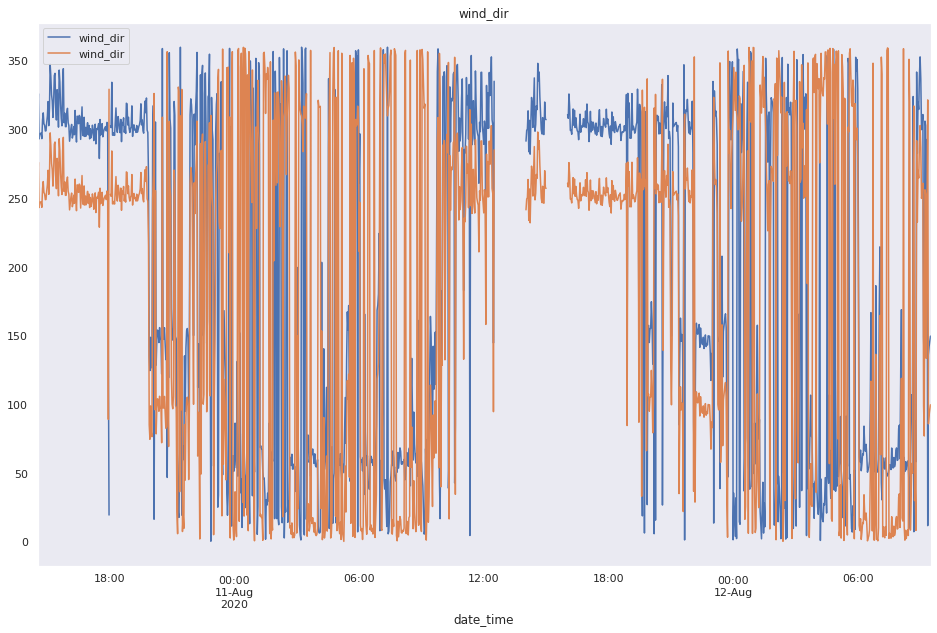

In [ ]:
plot_components([add_wind_dir(wm1), wm1myr], ['wind_dir'])

In [ ]:
def binned_dir(wind_dir, nbin=8):
    width = 360 / nbin
    wd = wind_dir.copy()
    wd = (wd / width).round()*width
    return wd

In [ ]:
wm1['binned_wd'] = binned_dir(wm1.wind_dir)

In [ ]:
wm1r['binned_wd'] = binned_dir(wm1r.wind_dir)

In [ ]:
wm1

,u,v,w,wind_speed,wind_dir,binned_wd
date_time,,,,,,
2020-08-10 14:32:00,-0.997092,-1.288860,-0.333608,1.663320,257.4790,270.0
2020-08-10 14:34:00,-1.526010,-1.026130,0.089625,1.841100,279.5420,270.0
2020-08-10 14:36:00,-0.839254,-1.966400,-0.181608,2.145710,242.9240,225.0
2020-08-10 14:38:00,-1.253230,-2.498030,-0.105850,2.796770,248.2170,270.0
2020-08-10 14:40:00,-0.646417,-1.258450,0.009992,1.414800,248.6120,270.0
...,...,...,...,...,...,...
2020-08-12 09:22:00,-0.856775,0.174583,-0.017275,0.874552,323.2640,315.0
2020-08-12 09:24:00,0.645167,0.630683,0.042383,0.903215,64.1510,45.0
2020-08-12 09:26:00,0.818796,0.638592,-0.195817,1.056680,84.7846,90.0


In [ ]:
plot_components([wm1, wm1myr], ['wind_dir'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'wind_dir'}, xlabel='date_time'>],
      dtype=object)

In [ ]:
plot_components(resample([wm1myr, m6], '8min'), ['wind_speed_hor', 'u', 'v'], vertical=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'wind_speed_hor'}, xlabel='date_time'>,
       <AxesSubplot:title={'center':'u'}, xlabel='date_time'>,
       <AxesSubplot:title={'center':'v'}, xlabel='date_time'>],
      dtype=object)

In [ ]:
plot_components(resample([wm1myr, m6], '8min'), vertical=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'u'}, xlabel='date_time'>,
       <AxesSubplot:title={'center':'v'}, xlabel='date_time'>,
       <AxesSubplot:title={'center':'w'}, xlabel='date_time'>],
      dtype=object)

In [ ]:
plot_dist_comp(resample([wm1myr - m6], '8min'))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
(wm1myr - m6) / wm1myr

,u,v,w,wind_speed,wind_dir,wind_speed_hor
date_time,,,,,,
2020-08-10 14:32:00,0.128655,-0.173588,0.812905,-0.139285,-0.009551,-0.161627
2020-08-10 14:34:00,-0.339053,-0.155233,1.018224,-0.156086,-0.012750,-0.157458
2020-08-10 14:36:00,0.092302,-0.157286,0.276144,-0.108521,-0.021637,-0.110812
2020-08-10 14:38:00,0.150746,-0.164689,0.658557,-0.120269,-0.033355,-0.121001
2020-08-10 14:40:00,0.332203,-0.188528,12.835659,-0.128812,-0.049146,-0.125741
...,...,...,...,...,...,...
2020-08-12 09:22:00,0.599157,0.709218,1.183309,0.637839,-0.067871,0.637786
2020-08-12 09:24:00,-0.177735,0.204407,-1.977399,0.190418,0.073246,0.201686
2020-08-12 09:26:00,2.271257,0.195278,1.544856,0.202046,0.080556,0.194509


In [ ]:
plot_dist_comp([(wm1myr - m6)/wm1myr], ['u', 'v'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
wm1r = rotate_wind_hor_plane(wm1, 50)

In [ ]:
plot_components([wm1, wm1r], ['wind_dir'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

array([<AxesSubplot:title={'center':'wind_dir'}, xlabel='date_time'>],
      dtype=object)